# Problem Statement

- Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?
- Try and find the best way to identify ideal customers to disburse loans to avoid the NPCs and  increase business.

In [492]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from datetime import datetime

# Statmodels implementation of Linear regression 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# Model Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [147]:
df = pd.read_csv('loantap_data.csv', index_col = 'Unnamed: 0')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [148]:
df.shape

(396030, 27)

In [149]:
# Understanding the structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [150]:
# Reviewing the statistical summary
# Reviewing the details of Numerical Columns
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [151]:
details = df.describe()
details

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [152]:
# Checking if any columns will have outliers
# -- max values should be > mean + 3*std
# -- min value should be < mean - 3*std

for col in df.describe().columns:
    negative_three_std = details.loc['mean', col] - (3*details.loc['std', col])
    positive_three_std = details.loc['mean', col] + (3*details.loc['std', col])
    max_value = details.loc['max', col]
    min_value = details.loc['min', col]
    
    if positive_three_std > max_value or negative_three_std < min_value: 
        print(col)

loan_amnt
int_rate
installment
annual_inc
dti
open_acc
pub_rec
revol_bal
revol_util
total_acc
mort_acc
pub_rec_bankruptcies


In [153]:
# Reviewing the details of Categorical Columns
df.describe(include = 'O')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


- The data has 396030 rows and 27 different features
- The data has missing values in case of few columns
- The data types assigned are appropriate and need no change
- There are quite a few columns with outlier data

## Data Cleaning

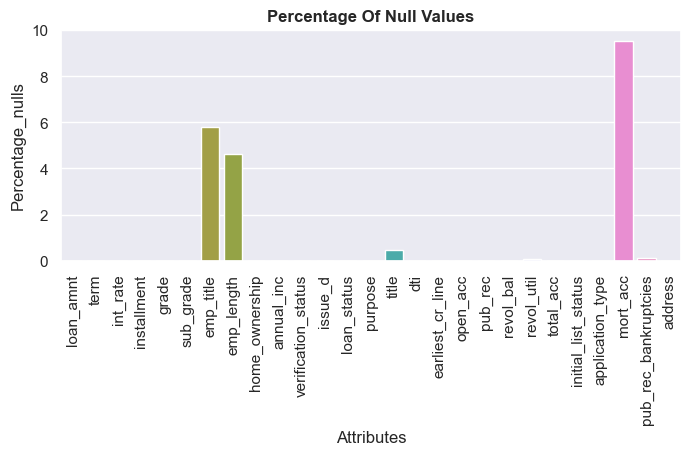

In [154]:
# Identifying & treating the null values 

df_null = df.isnull().sum().reset_index()
df_null.columns = ['Attributes', 'Sum of nulls']
df_null['Percentage_nulls'] = (df_null['Sum of nulls']/df.shape[0])*100

# Plotting percentage of null values

plt.figure(figsize = (8,3))
sns.barplot(data = df_null, x = 'Attributes', y = 'Percentage_nulls')
plt.xticks(rotation = 90)
plt.title('Percentage Of Null Values', fontweight = 'bold')
plt.show()

- We have 6 column with null data
- As the null value percentage is less than 3% in case of title, revol_util & pub_rec_bankruptcies columns, we will drop such records from these columns.
- And in case of emp_title, emp_length and mort_acc columns we will replace these null values with means/modes of respective columns

In [156]:
# Missing value treatment

# Deleting null records
df = df[~df['title'].isnull()]
df = df[~df['revol_util'].isnull()]
df = df[~df['pub_rec_bankruptcies'].isnull()]

# Replacing nulls
df['emp_title'] = df['emp_title'].fillna(df['emp_title'].mode().item())
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode().item())
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].mean())

In [157]:
# Confirming the removal of null values
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

## Non Graphical Analysis

In [158]:
num_cols = [x for x in df.columns if df[x].dtypes != 'O']
cat_cols = [x for x in df.columns if x not in num_cols]

In [159]:
num_cols

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [160]:
cat_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [171]:
# Checking the unique values and their value counts

for col in df.columns:
    unique_counts = df[col].nunique()
    if unique_counts <= 20:
        print(f'{col}:\n{df[col].value_counts()}\n\n')

term:
 36 months    300024
 60 months     93441
Name: term, dtype: int64


grade:
B    115395
C    105253
A     63859
D     63044
E     31247
F     11647
G      3020
Name: grade, dtype: int64


emp_length:
10+ years    143346
2 years       35597
< 1 year      31489
3 years       31469
5 years       26353
1 year        25637
4 years       23811
6 years       20750
7 years       20727
8 years       19071
9 years       15215
Name: emp_length, dtype: int64


home_ownership:
MORTGAGE    197110
RENT        158770
OWN          37443
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64


verification_status:
Verified           138867
Source Verified    130571
Not Verified       124027
Name: verification_status, dtype: int64


loan_status:
Fully Paid     316271
Charged Off     77194
Name: loan_status, dtype: int64


purpose:
debt_consolidation    233108
credit_card            82577
home_improvement       23836
other                  20976
major_purchase   

Observations:
- We don't have any data discrepancies in terms of duplications/spelling mistakes for any category of any attribute.
- And we don't have any duplicates

## Univariate Analysis

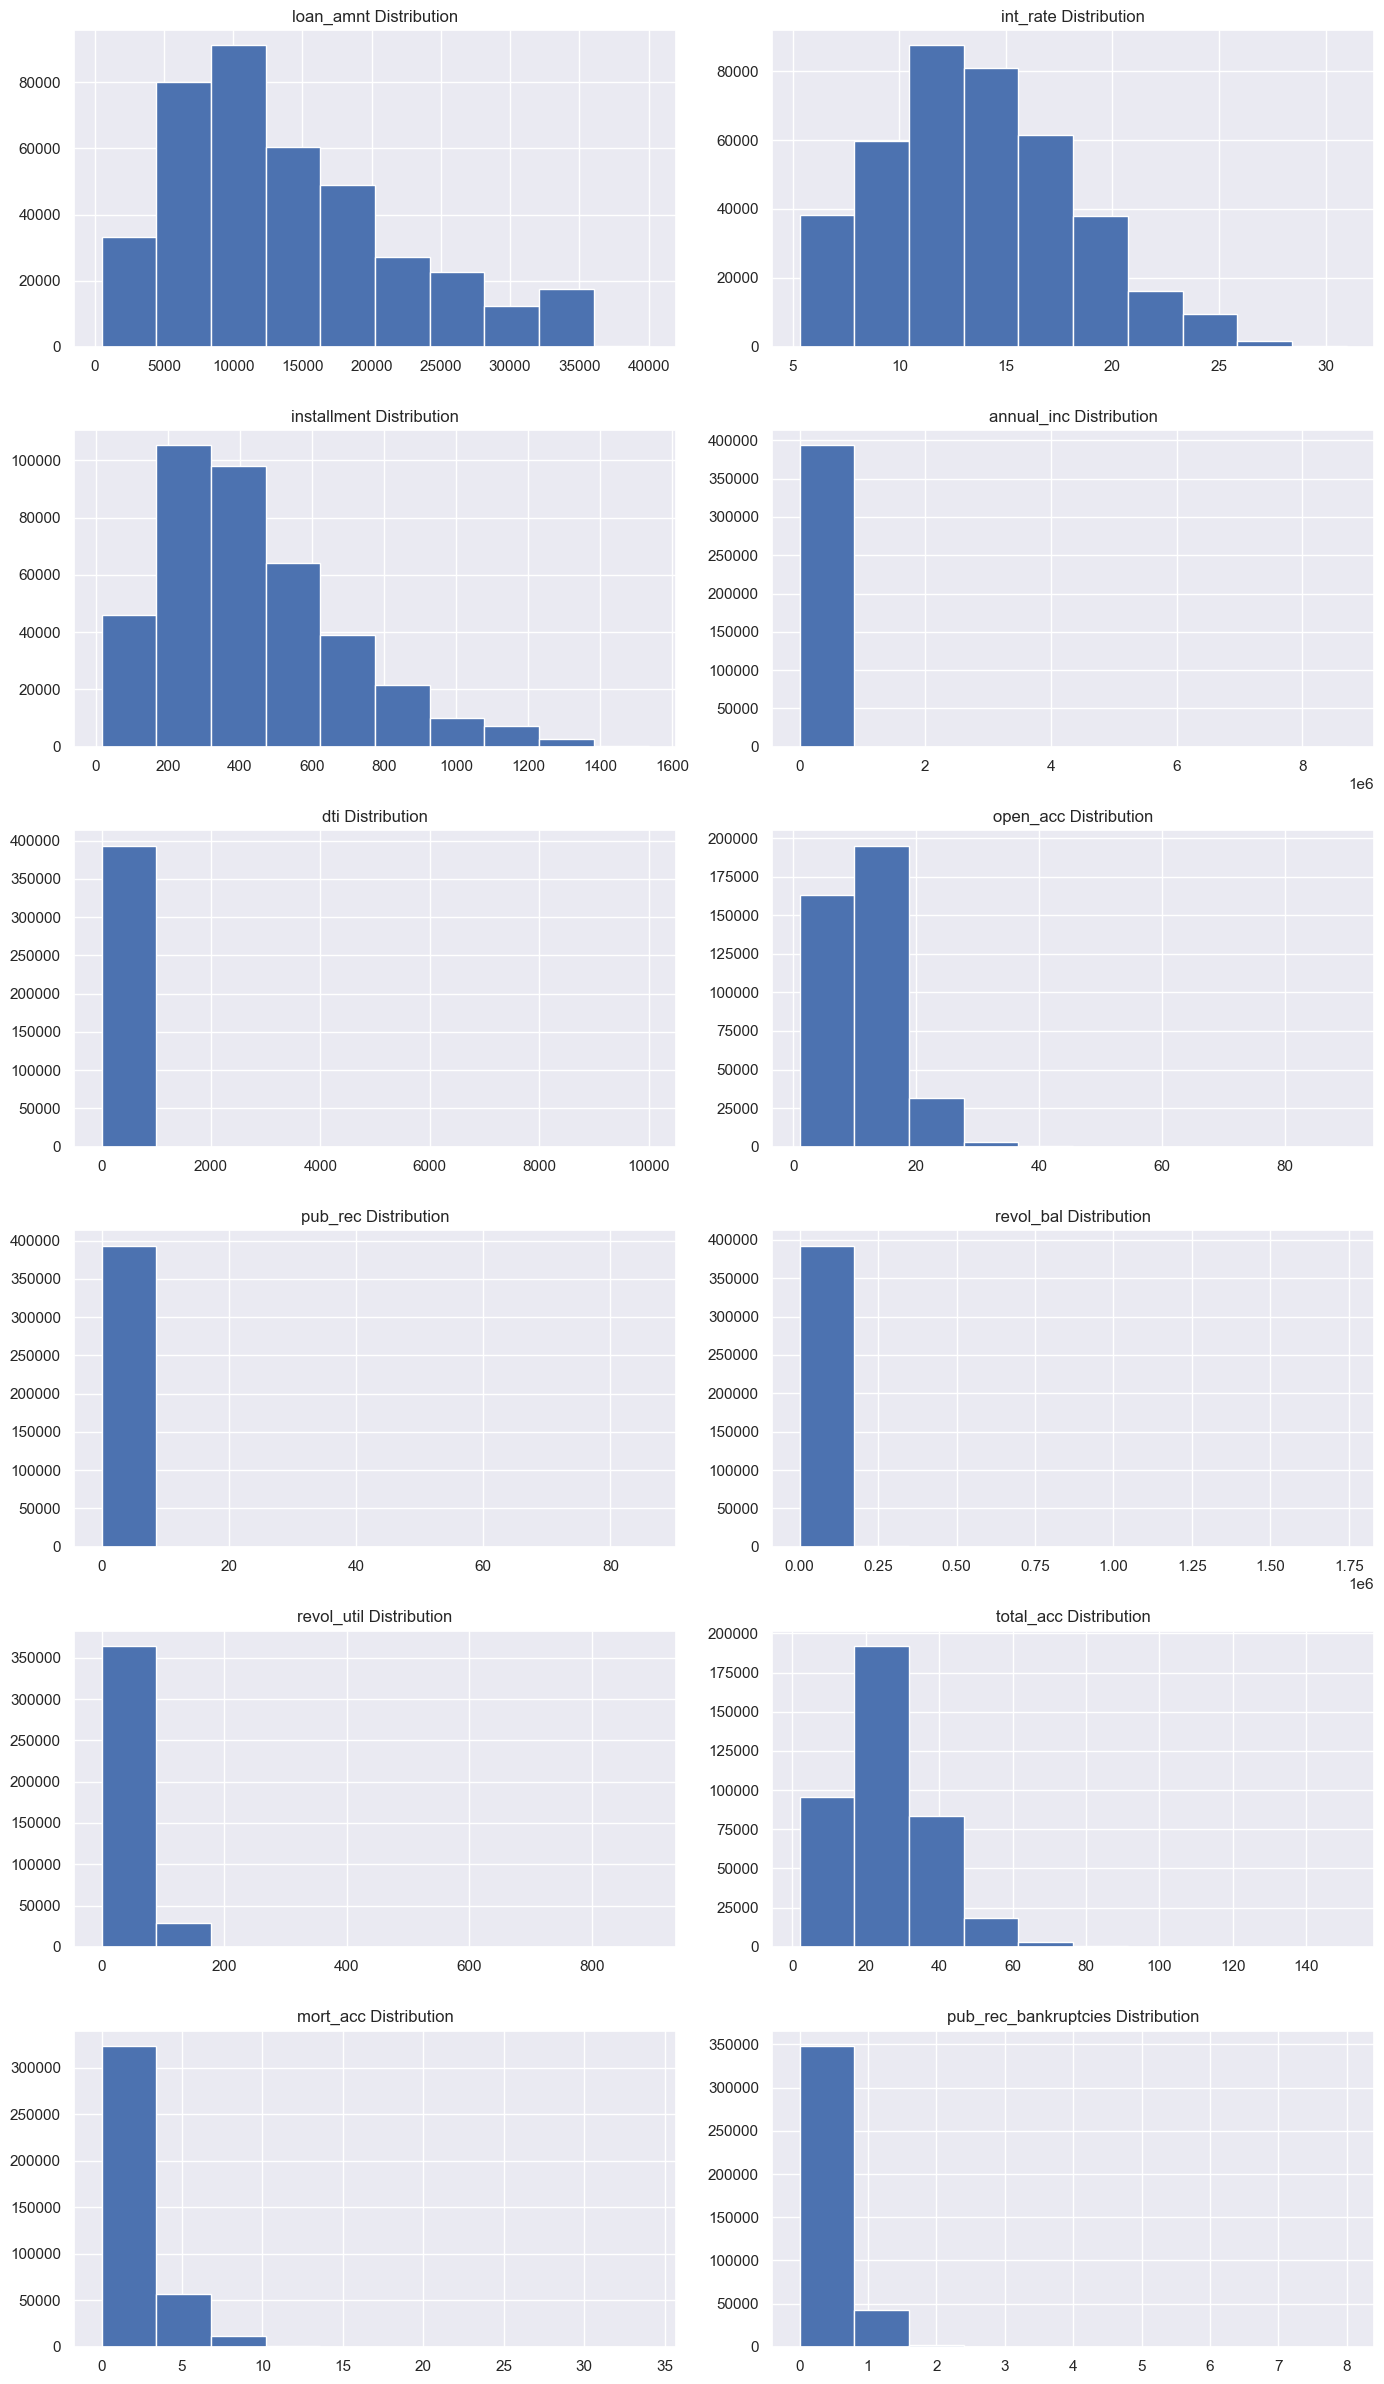

In [180]:
# Checking the distribution of numerical features
plt.figure(figsize = (14,24))
for i in range(len(num_cols)):
    plt.subplot(6,2,i+1)
    plt.hist(df[num_cols[i]])
    plt.title(f'{num_cols[i]} Distribution')
plt.tight_layout()

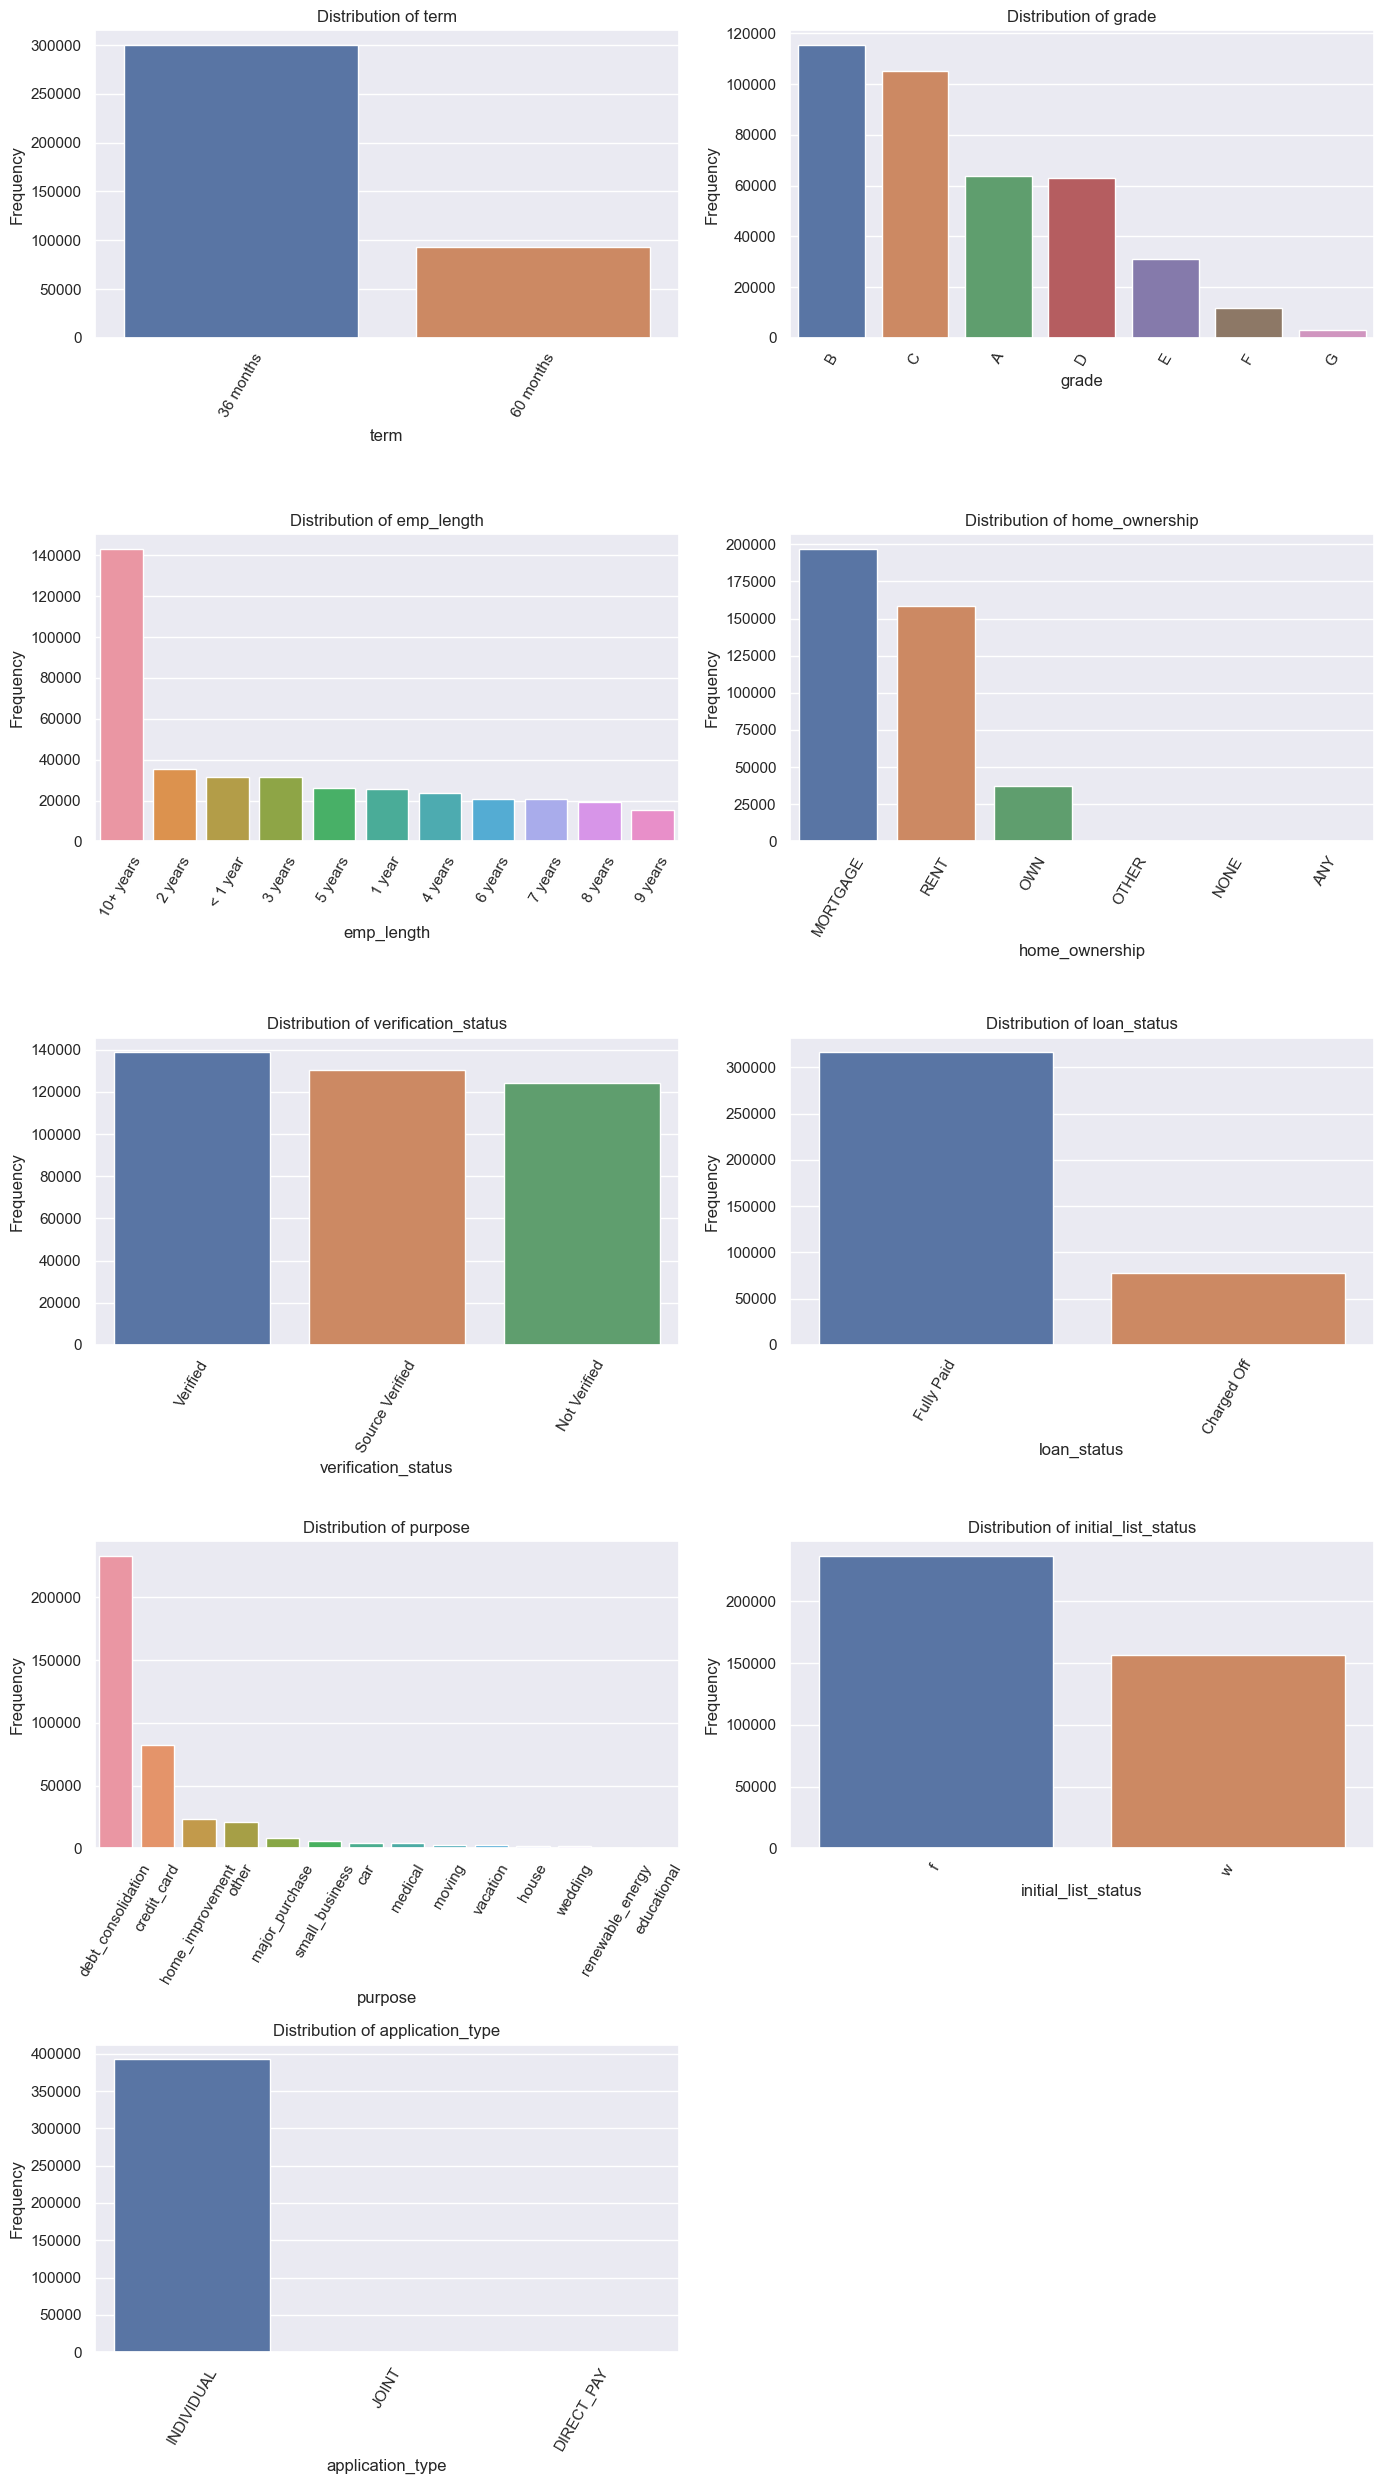

In [182]:
# Analyzing the distribution of categorical features
# Only considering the fields with unique counts less than 20

df_cols = [col for col in cat_cols if df[col].nunique() <= 20]

plt.figure(figsize = (14, 25))

for i in range(1,len(df_cols)+1):
    rows = (len(df_cols)//2)+1
    plt.subplot(rows, 2, i)
    sns.countplot(data= df, x = df_cols[i-1],
                 order = df[df_cols[i-1]].value_counts().index)
    plt.title(f'Distribution of {df_cols[i-1]}')
    plt.xticks(rotation = 60)
    plt.xlabel(df_cols[i-1])
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Observations:

Numerical Features
- All the numerical features are right skeweed, indicating higher the values lower the frequency

Categorical data;
- Most of the loans are short term (36 months)
- Majority of the loans are graded as B followed by C and A.
- Majority of the individuals have an employment length of more than 10 years.
- Majority of the individuals have a mortgage loan followed by the people who are renting a place and very less percentage of people own the house.
- Verification status is almost evenly distributed among it's categories.
- The target variable "Loan status" data is imbalanced, as majority of individuals have fully paid off the loans.
- Most often debt_consolidation followed by the credi_card debt is the purpose behind the loans.
- The initial listing status is also dominated by f category over w.
- The individual loans dominate the application type category

1. What percentage of customers have fully paid their Loan Amount?
2. Comment about the correlation between Loan Amount and Installment features.
3. The majority of people have home ownership as _______.
4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
5. Name the top 2 afforded job titles.
6. Thinking from a bank's perspective, which metric should our primary focus be on..
- ROC AUC
- Precision
- Recall
- F1 Score
7. How does the gap in precision and recall affect the bank?
8. Which were the features that heavily affected the outcome?
9. Will the results be affected by geographical location? (Yes/No)

**Que : The majority of people have home ownership as ___.**

- Majority of the people own homes under mortgage

## Bivariate Analysis

In [237]:
# Converting the target variables to 1 and 0

df.loc[df['loan_status'] == 'Fully Paid', 'loan_status'] = 1
df.loc[df['loan_status'] == 'Charged Off', 'loan_status'] = 0

df['loan_status'] = df['loan_status'].astype('int')

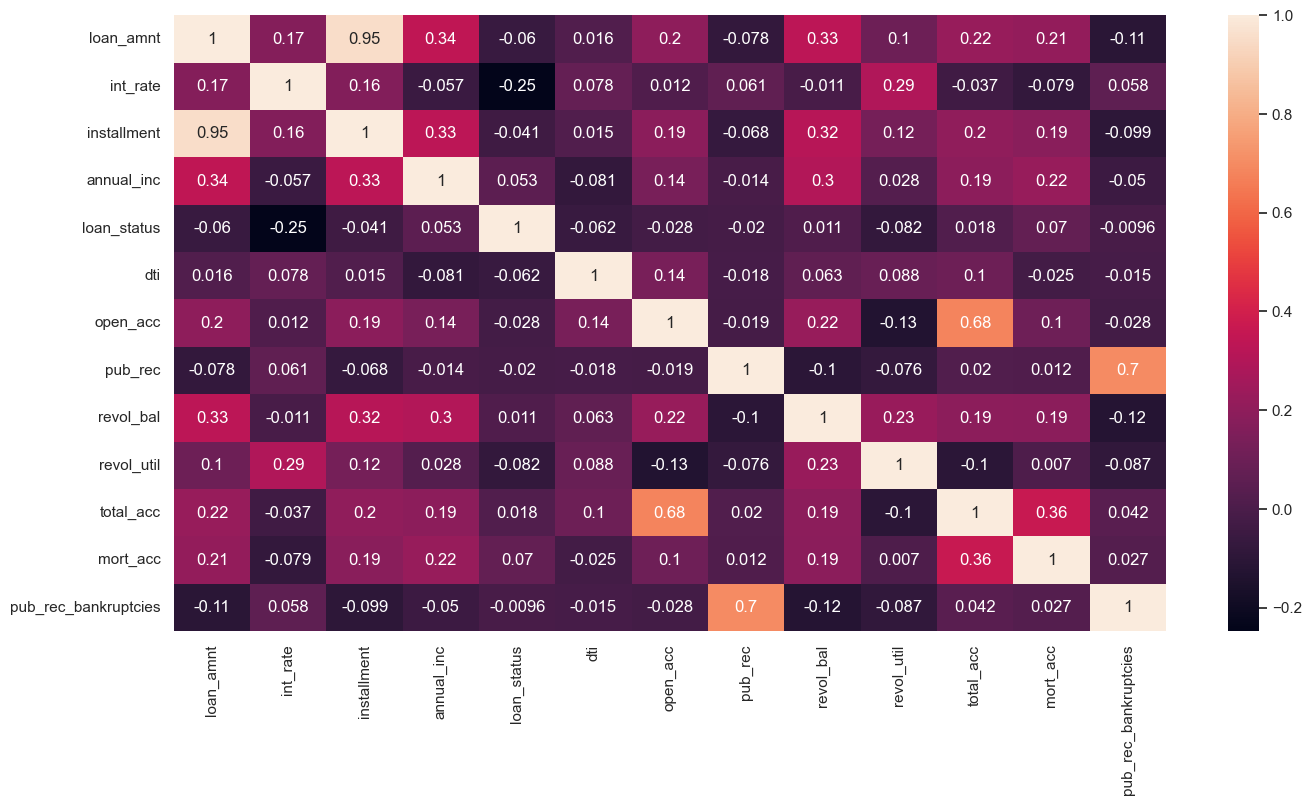

In [243]:
# Relationship of numerical variables with target variable

plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

- None of the features are highly correlated to the target variable (loan_status)
- While features like (loan_amount, installements), (total_acc, open_acc), (pub_rec, pub_rec_bankruptcies) are few combination which have high positive correlation with each other indicating increase in one will increase other.

**Que : Comment about the correlation between Loan Amount and Installment features.**

- The correlation analysis shows very high positive correlation between the Loan amount and installments field. 
- This indicates that as the loan amount increase the installments will also increase.

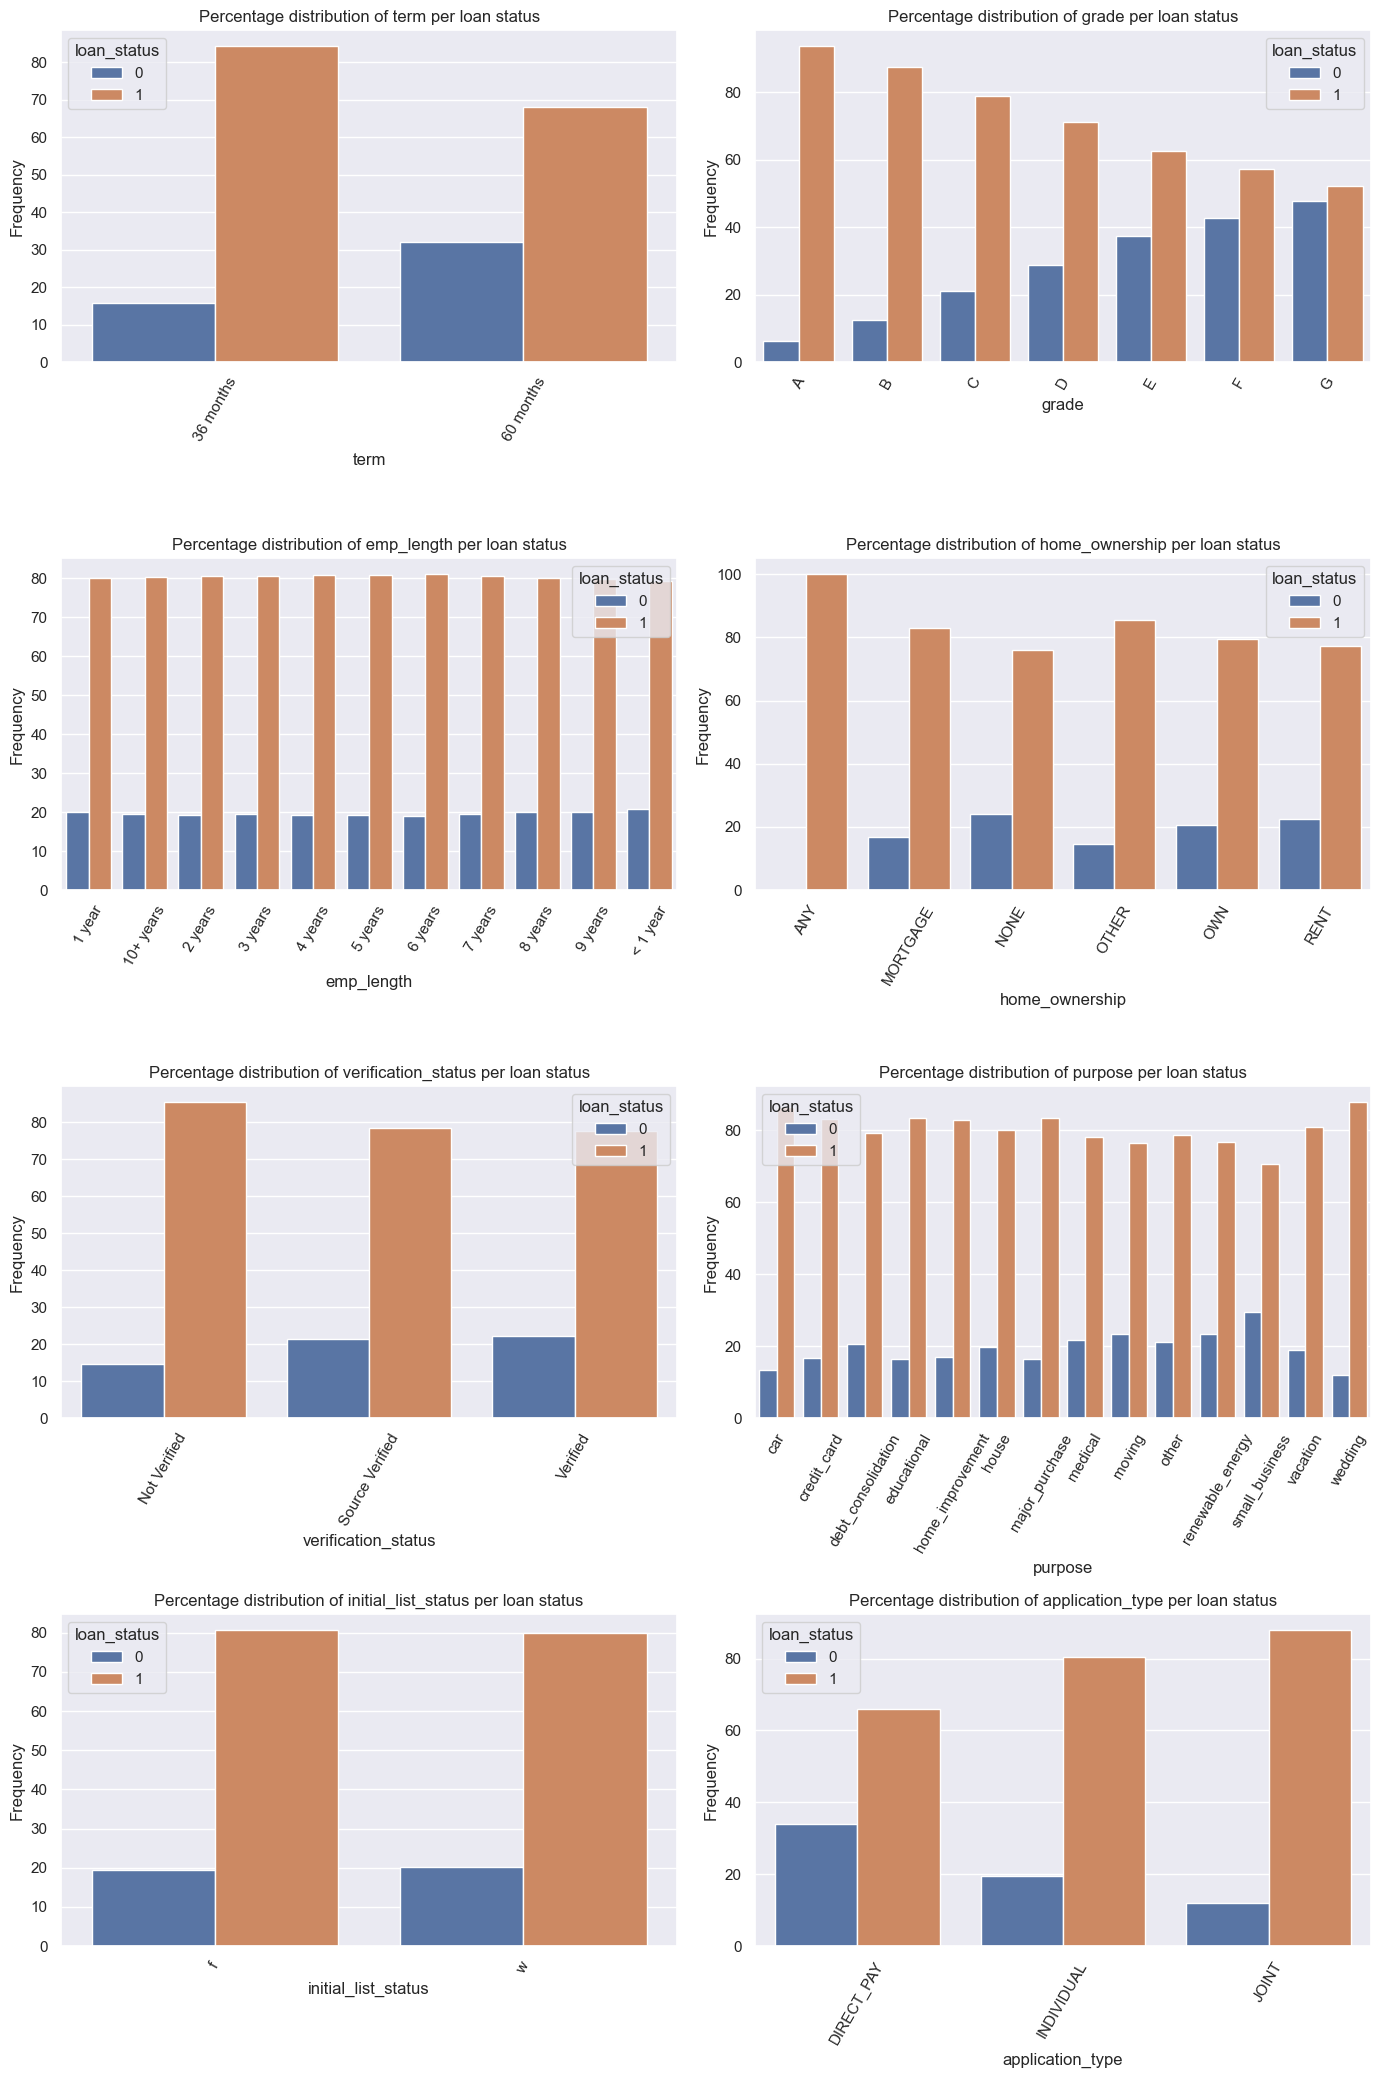

In [254]:
# Relationship of categorical variables with target variable
# Only considering the fields with unique counts less than 20

df_cols = [col for col in cat_cols if df[col].nunique() <= 20]
df_cols.remove('loan_status')

# labels = ['Fully Paid', 'Charged Off']

plt.figure(figsize = (14, 25))

for i in range(1,len(df_cols)+1):
    rows = (len(df_cols)//2)+1
    plt.subplot(rows, 2, i)
    df_plot = df.groupby(df_cols[i-1])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    sns.barplot(data = df_plot, x = df_cols[i-1], y = 'percent', hue = 'loan_status')
    plt.title(f'Percentage distribution of {df_cols[i-1]} per loan status')
    plt.xticks(rotation = 60)
    plt.xlabel(df_cols[i-1])
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- People with shorter loan repayment durations are highly likely to fully repay the loans.
- The grading system is on point because as the grade worsens so does the liklihood of fully repaying the loans.
- The features like length of employment, home ownership, verification status, purpose, initial_list_status have no significant effect on the loan status.
- The joing loan application  type has the highest likelihood of full repayment followed by individual and direct pay

**Que : People with grades ‘A’ are more likely to fully pay their loan. (T/F)**

- As per the analysis it's true that more than 90% of the people from grade A are likely to fully pay their loans.

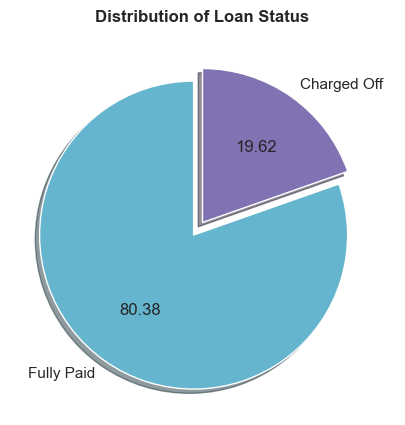

In [262]:
# What percentage of customers have fully paid their Loan Amount?

prod_dist = df['loan_status'].value_counts(normalize = True)
keys = list(prod_dist.keys())
values = list(prod_dist.values)
keys = ['Fully Paid', 'Charged Off']

plt.figure(figsize = (8,5))
plt.pie(values,
       labels= keys ,
       colors=["c","m","g"],
       startangle=90,
       shadow=True,
       explode=(0.1,0),
       autopct='%.2f')
plt.title('Distribution of Loan Status', fontweight = 'bold')
plt.show()

**Que : What percentage of customers have fully paid their Loan Amount?**

- Around 80% of the customers have fully paid their loan amount

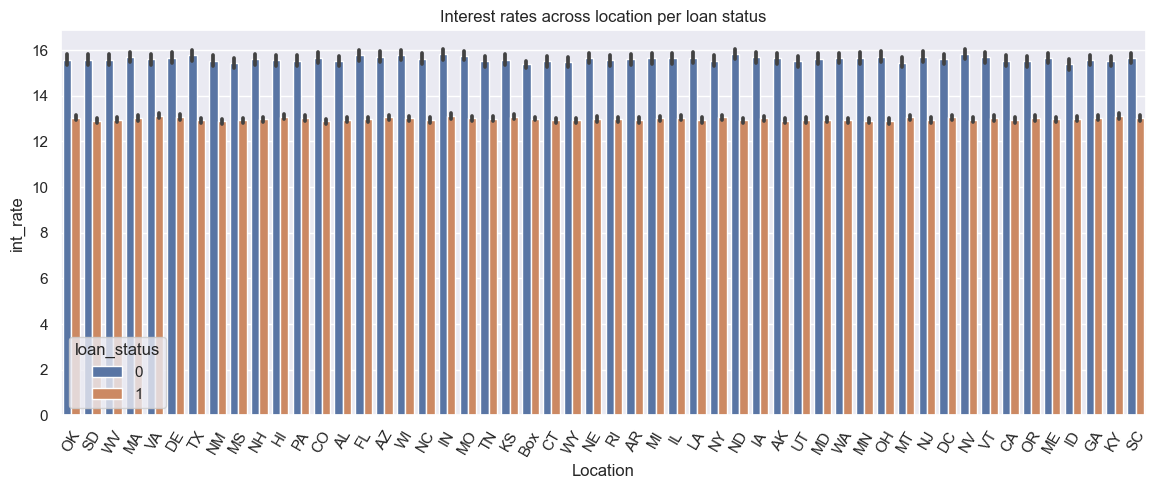

In [294]:
# Will the results be affected by geographical location? (Yes/No)
plt.figure(figsize = (14, 5))
sns.barplot(data = df, x = 'Location', y = 'int_rate', hue = 'loan_status')
plt.title(f'Interest rates across location per loan status')
plt.xticks(rotation = 60)
plt.show()

**Que : Will the results be affected by geographical location? (Yes/No)**

- As interest rates are inversely proportional to the loan status, variation in interest rates in certain regions might indicate the effect of geographical location on the loan staus. However, this doesn't seem to be the case.
- As per the analysis on the geographical locations and their interest rates for respective loan statuses, it's clear that the geographical locations don't have an effect on the results.

## Data Preprocessing

### Duplicate value check

In [173]:
# Checking for duplicates
df.duplicated().sum()

0

### Outlier detection and treatment

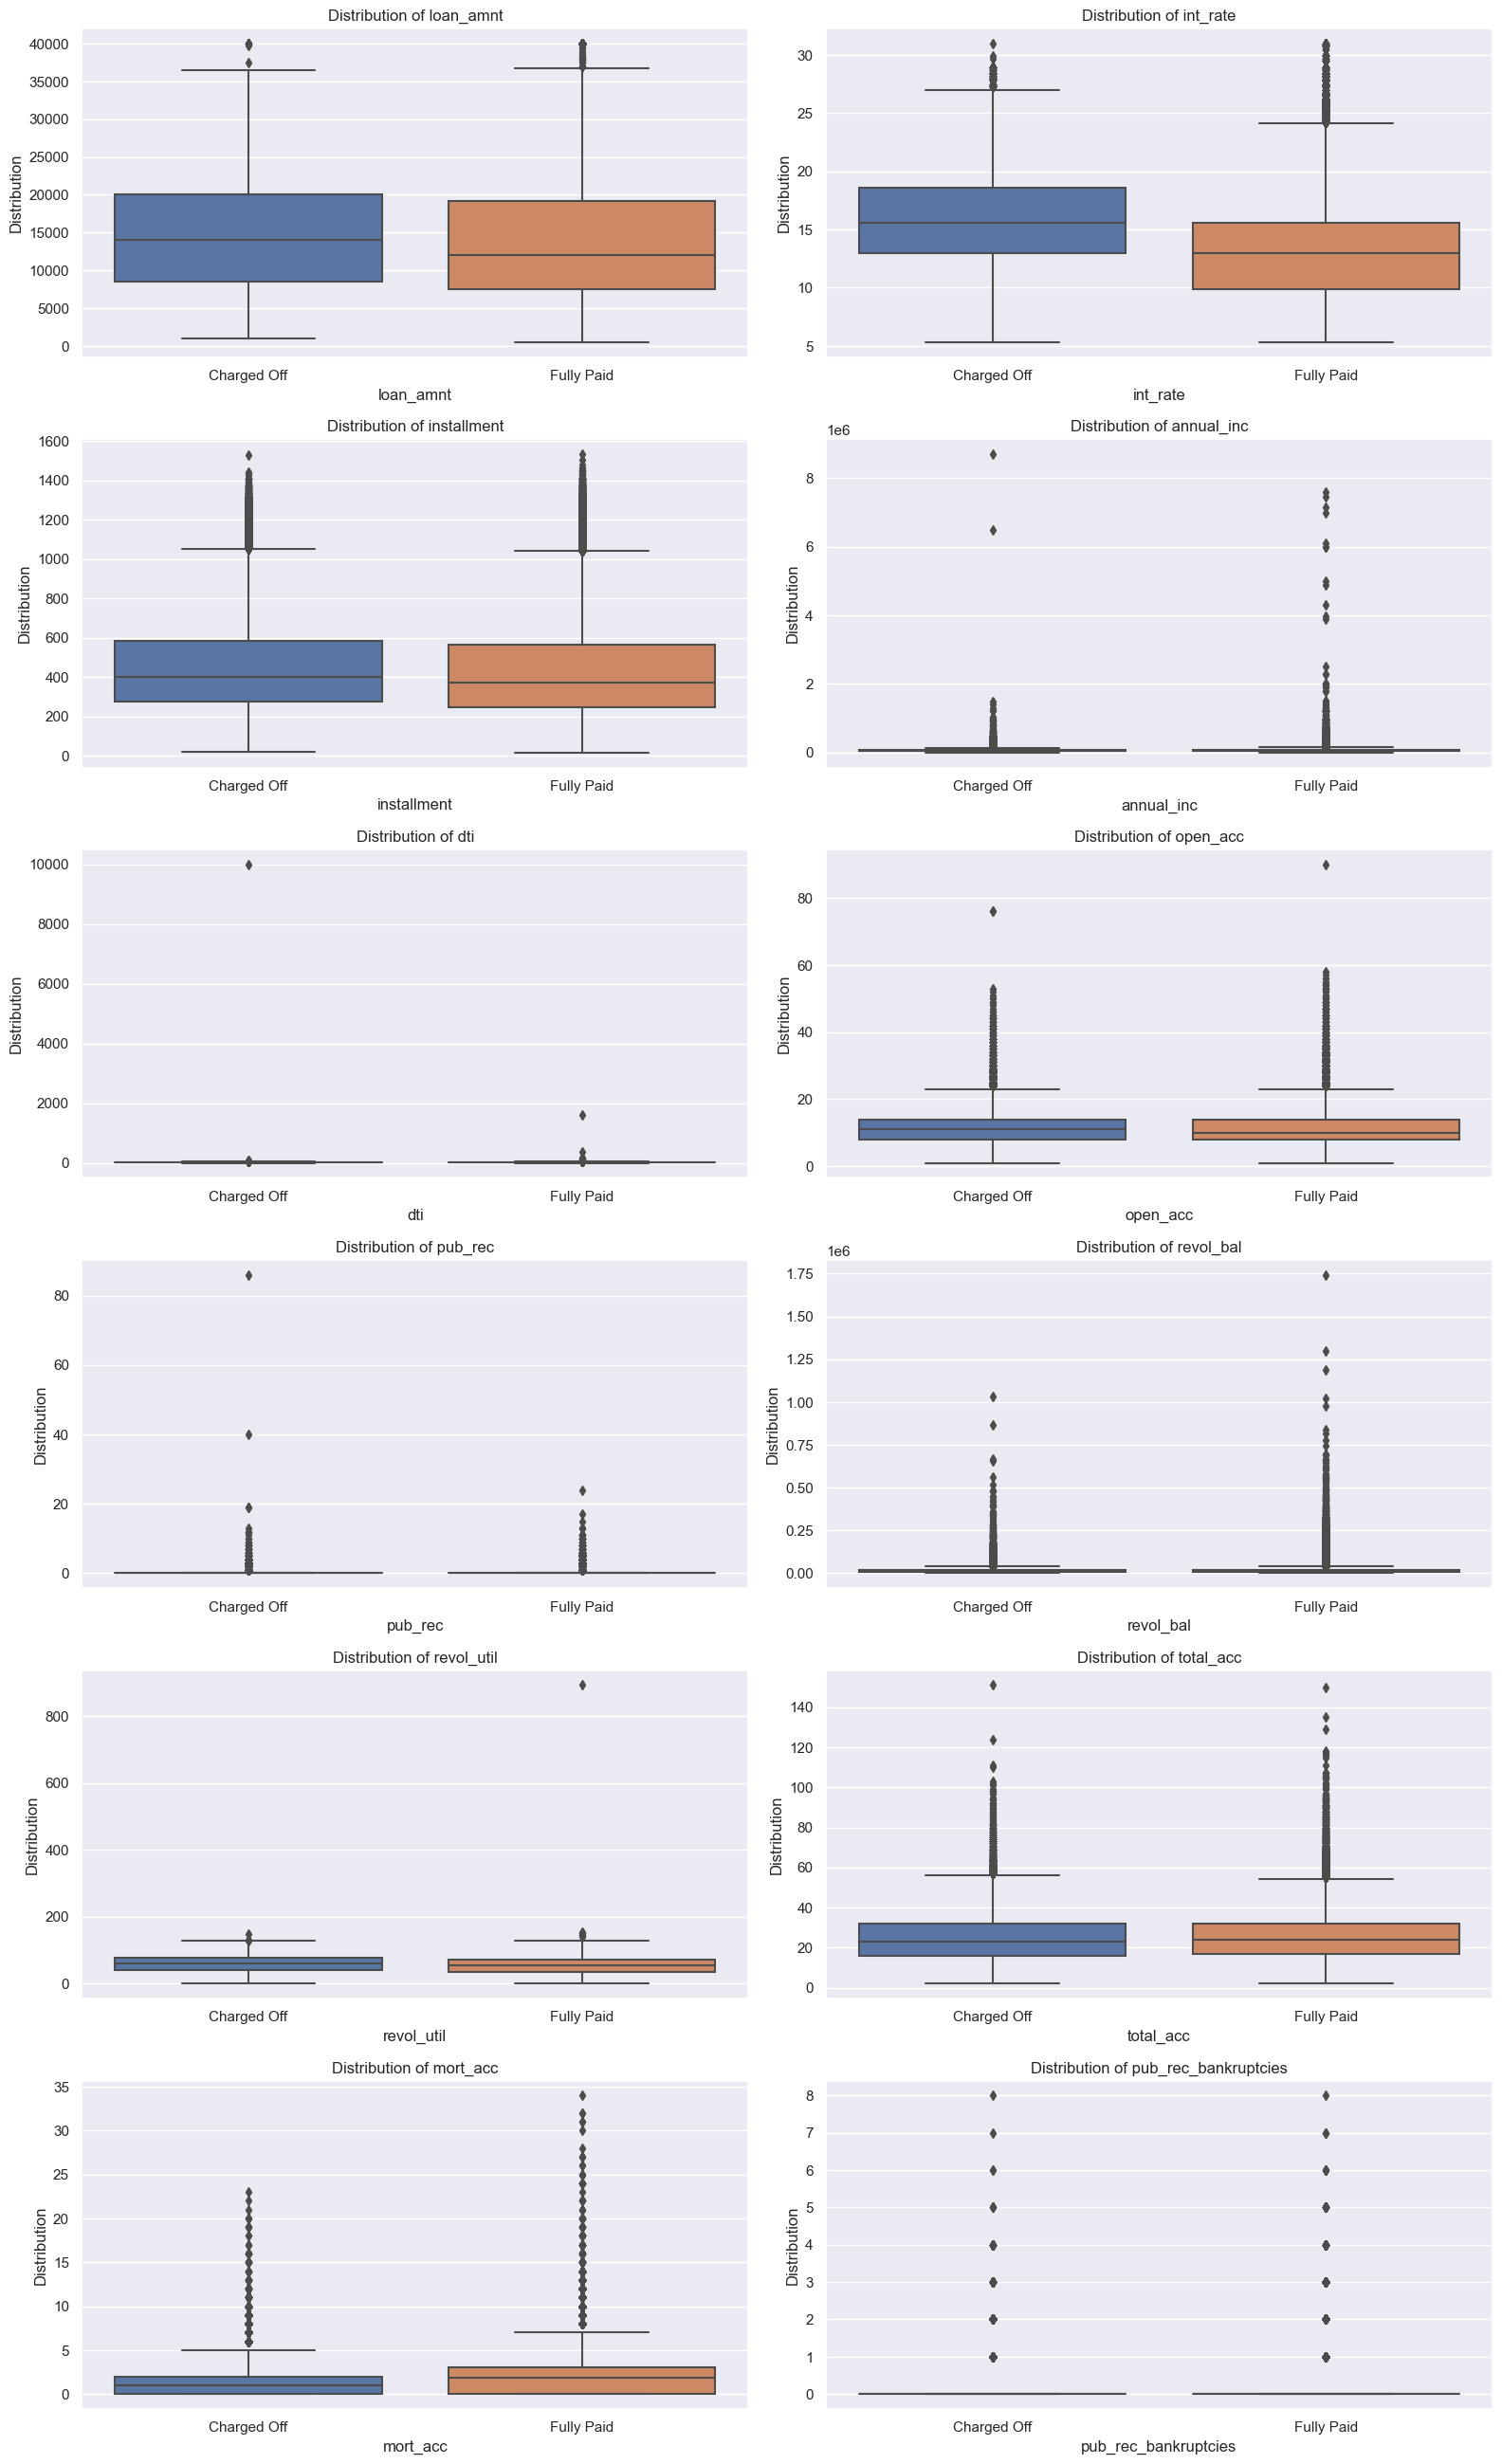

In [267]:
# Checking for outliers

plt.figure(figsize = (16, 30))
for i in range(1,len(num_cols)+1):
    rows = (len(num_cols)//2)+1
    plt.subplot(rows, 2, i)
    sns.boxplot(data= df, y = num_cols[i-1], x = 'loan_status')
    plt.title(f'Distribution of {num_cols[i-1]}')
    plt.xlabel(num_cols[i-1])
    plt.ylabel('Distribution')
    plt.xticks(ticks = [0,1], labels = ['Charged Off', 'Fully Paid'])

plt.tight_layout()
plt.show()

- From the above plots we can see multiple features having outliers

In [255]:
# Checking percentage of Outliers for each field

for col in num_cols:
    q1 = np.quantile(df[col],0.25)
    q3 = np.quantile(df[col],0.75)
    IQR = q3-q1
    upper_wisker = q3 + (1.5 * IQR)
    lower_wisker = q1 - (1.5 * IQR)
    upper_outliers = len(df[df[col] > upper_wisker])
    lower_outliers = len(df[df[col] < lower_wisker])
    outlier_percentage = round((upper_outliers + lower_outliers)*100/len(df),2)
    
    print(f'Field = {col}')
    print(f'Total Outliers Count = {upper_outliers + lower_outliers}')
    print(f'Outlier percentage = {outlier_percentage}\n')

Field = loan_amnt
Total Outliers Count = 181
Outlier percentage = 0.05

Field = int_rate
Total Outliers Count = 3716
Outlier percentage = 0.94

Field = installment
Total Outliers Count = 11139
Outlier percentage = 2.83

Field = annual_inc
Total Outliers Count = 16581
Outlier percentage = 4.21

Field = dti
Total Outliers Count = 256
Outlier percentage = 0.07

Field = open_acc
Total Outliers Count = 10228
Outlier percentage = 2.6

Field = pub_rec
Total Outliers Count = 57391
Outlier percentage = 14.59

Field = revol_bal
Total Outliers Count = 21090
Outlier percentage = 5.36

Field = revol_util
Total Outliers Count = 11
Outlier percentage = 0.0

Field = total_acc
Total Outliers Count = 8451
Outlier percentage = 2.15

Field = mort_acc
Total Outliers Count = 6816
Outlier percentage = 1.73

Field = pub_rec_bankruptcies
Total Outliers Count = 44866
Outlier percentage = 11.4



In [269]:
# Outlier Treatment
# All the fields have outlier percentage less than 5% except for pub_rec, pub_rec_bankruptcies & revol_bal fields 
# Hence we will be dropping the outlier records from all the columns except the above mentioned 3 fields

for col in num_cols:
    if col not in ['pub_rec', 'pub_rec_bankruptcies','revol_bal']:
        q1 = np.quantile(df[col],0.25)
        q3 = np.quantile(df[col],0.75)
        IQR = q3-q1
        upper_limit = q3 + (1.5 * IQR)
        lower_limit = q1 - (1.5 * IQR)

        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

In [272]:
# For pub_rec, pub_rec_bankruptcies we will be creating flags for it & transforming the data into 0 and 1 later
# Incase of revol_bal field we will be capping the value to upper limit 

q1 = np.quantile(df['revol_bal'],0.25)
q3 = np.quantile(df['revol_bal'],0.75)
IQR = q3-q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['revol_bal'] < lower_limit, 'revol_bal'] = lower_limit
df.loc[df['revol_bal'] > upper_limit, 'revol_bal'] = upper_limit

### Feature Engineering

In [277]:
# Creating flags for following columns

for i in ['pub_rec','pub_rec_bankruptcies','mort_acc']:
    df[i].apply(lambda x: 1 if x >= 1 else 0)

In [290]:
# Creating a location column
df['Location'] = df['address'].str.split(',').str[1].str.split(' ').str[1]

### Data preprocessing for modeling

In [315]:
# Creating month columns
df['issue_month'] = df['issue_d'].str[:3]
df['earliest_cr_line_month'] = df['earliest_cr_line'].str[:3]

In [321]:
# Creating year columns
df['issue_year'] = df['issue_d'].str[4:].astype('int')
df['earliest_cr_line_year'] = df['earliest_cr_line'].str[4:].astype('int')

In [392]:
# Only keeping required columns for building model
a = ['emp_title','issue_d','title','earliest_cr_line','address']
req_cols = [x for x in df.columns if x not in a]

# Creating a new dataset out of necessary columns
df_ml = df[req_cols]

In [395]:
# Encoding the categorical data with 1 and 0 for Machine Learning 

def ohe(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

ml_cat_cols = ['term','grade', 'sub_grade', 'emp_length', 'home_ownership','verification_status', 'purpose',
               'initial_list_status', 'application_type', 'Location', 'issue_month', 'earliest_cr_line_month']

for col in ml_cat_cols:
    df_ml = ohe(col,df_ml)

In [401]:
# Checking the shape of transformed data
df_ml.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,10000.0,11.44,329.48,117000.0,1,26.24,16.0,0.0,36296.75,41.8,...,0,0,0,0,1,0,0,0,0,0
1,8000.0,11.99,265.68,65000.0,1,22.05,17.0,0.0,20131.00,53.3,...,0,0,0,1,0,0,0,0,0,0
2,15600.0,10.49,506.97,43057.0,1,12.79,13.0,0.0,11987.00,92.2,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,54000.0,1,2.60,6.0,0.0,5472.00,21.5,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,17.27,609.33,55000.0,0,33.95,13.0,0.0,24584.00,69.8,...,0,0,0,0,0,1,0,0,0,0


In [404]:
# Spliting the data into train and test

train_cols = [x for x in df_ml.columns if x != 'loan_status']

X = df_ml[train_cols]
Y = df_ml['loan_status']

In [405]:
X.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,Mar,Mar,May,May,Nov,Nov,Oct,Oct,Sep,Sep
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36296.75,41.8,25.0,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.00,53.3,27.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.00,92.2,26.0,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.00,21.5,13.0,...,0,0,0,0,1,0,0,0,0,1
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.00,69.8,43.0,...,0,1,0,0,0,0,0,0,0,0


In [406]:
# Scaling the data
# scaling_cols = [x for x in df_ml.columns if x not in ml_cat_cols]

# Standardizing the data
scaler = StandardScaler()
df_ml_scaled = scaler.fit_transform(X)

# Creating dataframe out of scaled data
df_ml_scaled = pd.DataFrame(df_ml_scaled)
df_ml_scaled.columns = X.columns
df_ml_scaled.head()

## Building Logistic Regression Model

In [433]:
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(206874, 183)

In [434]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [435]:
# Creating LR model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [436]:
# Testing the accuracy on training and validation data

print(f'Train Accuracy:{model.score(X_train,y_train)}, Val Accuracy:{model.score(X_val,y_val) }' ) 

Train Accuracy:0.806171872734128, Val Accuracy:0.8078685576727863


In [438]:
# To find optimum model lets do some hyperparameter tuning

train_scores = []
val_scores = []
scaler = StandardScaler()

for la in np.arange(0.01, 1000.0, 100): # range of values of Lambda
    scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = scaled_lr.score(X_train, y_train)
    val_score = scaled_lr.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

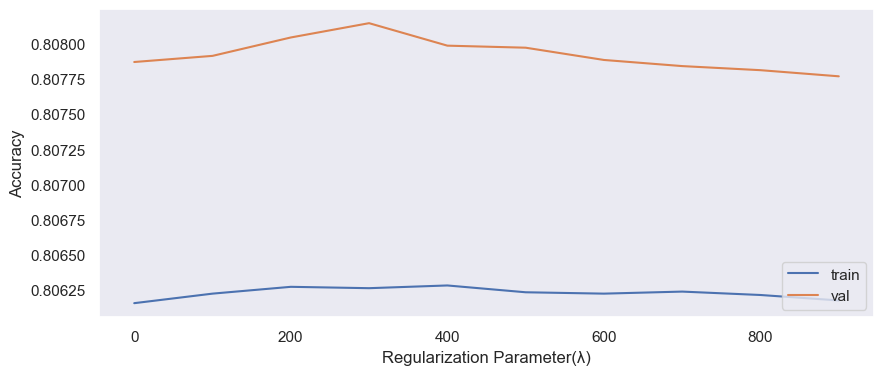

In [440]:
plt.figure(figsize = (10,4))
plt.plot(list(np.arange(0.01, 1000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 1000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [441]:
np.argmax(val_scores)

3

In [442]:
val_scores[3]

0.8081440877055599

In [443]:
# Since our best model is at 3rd index
lr_best = 0.01*3*100 

In [445]:
# Building the model with best learning rate
model1 = LogisticRegression(C = 1/lr_best)
model1.fit(X_train, y_train)

LogisticRegression(C=0.3333333333333333)

In [446]:
# Testing the accuracy on training and validation data

print(f'Train Accuracy:{model1.score(X_train,y_train)}, Val Accuracy:{model1.score(X_val,y_val) }' ) 

Train Accuracy:0.8061622050136799, Val Accuracy:0.807854056092114


In [551]:
coefficients = [x for x in zip(X.columns,model1.coef_.flatten())]
coefficients = pd.DataFrame(coefficients, columns = ['Attributes', 'coeff'])
coefficients.head()

,Attributes,coeff
0,loan_amnt,0.100398
1,int_rate,0.332273
2,installment,-0.211016
3,annual_inc,0.225017
4,dti,-0.170822


In [556]:
top_20_imp_features = coefficients.sort_values('coeff', ascending = False)[:20].reset_index(drop = True)

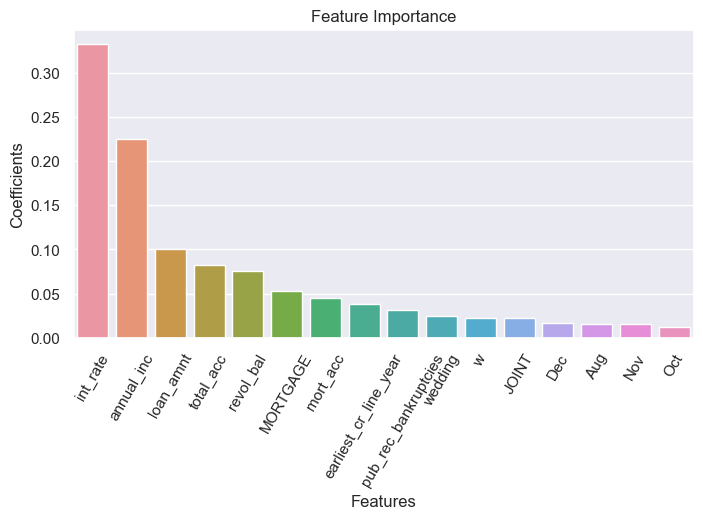

In [560]:
plt.figure(figsize=(8,4))
sns.barplot(data = top_20_imp_features, x = 'Attributes', y = 'coeff')
plt.title(f'Feature Importance')
plt.xticks(rotation = 60)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

**Que : Which were the features that heavily affected the outcome?**

- As per the ML model interest rate was the most contributing feature followed by annual income, loan amount, total acc, revolving balance, mortgage, mort acc, etc

In [473]:
# Checking accuracy on test data
print(f'Model performance on test data : {model1.score(X_test, y_test)*100}')

Model performance on test data : 80.23608230977828


In [449]:
# Getting the predictions
pred = model1.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [462]:
# Retriving the probabilites for the predictions
proba = model1.predict_proba(X_test)
class_1_prob = proba[:,1:]

array([[0.30398369, 0.69601631],
       [0.08620015, 0.91379985],
       [0.28583945, 0.71416055],
       ...,
       [0.09778978, 0.90221022],
       [0.28248033, 0.71751967],
       [0.35375314, 0.64624686]])

In [459]:
# Creating predictions dataframe

predictions = pd.DataFrame(y_test).reset_index(drop = True)
predictions['y_pred'] = pred
predictions['class_1_prob'] = class_1_prob
predictions.head()

## Model Evaluation

In [507]:
# Importing the evaluation metrics
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score

### AU-ROC Curve

In [479]:
fpr, tpr, thr = roc_curve(predictions.loan_status, predictions.class_1_prob)

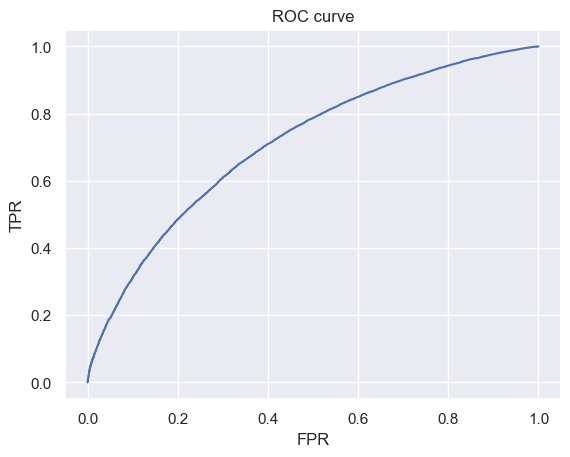

In [480]:
# Plotting the AU-ROC curve
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

- The covered under the curve is not good enough, hence there is room for improvement
- The AU-ROC curve doesn't work well on imbalanced data, and as we have imbalanced data we should consider ploting precision recall curve

### Precision Recall Curve

In [482]:
precision, recall, thr = precision_recall_curve(predictions.loan_status, predictions.class_1_prob)

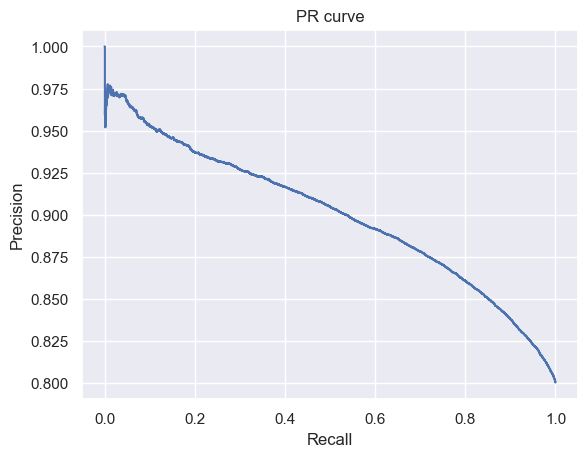

In [483]:
# Plotting the PR Curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [489]:
Area_under_the_curve = auc(recall, precision)*100
Area_under_the_curve

90.01290194982478

- Since the PR curve is covering 90% of the area, it tells us that model is performing quite well. 
- And as out data is imbalanced the PR cureve is the right metric to understand the model performance.

### Classification Report

In [490]:
conf_matrix = confusion_matrix(predictions.loan_status, predictions.y_pred)
conf_matrix # 2D np array

array([[  715, 13047],
       [  582, 54615]], dtype=int64)

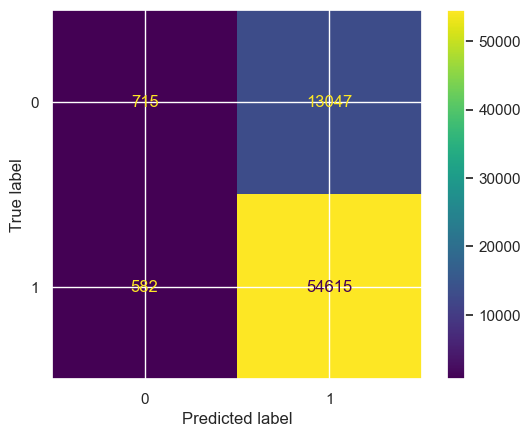

In [493]:
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

In [ ]:
# As we are more concerned over false positives we should check the precision metric

In [502]:
# Precision score
print(f'Precision of the Model: {precision_score(predictions.loan_status, predictions.y_pred)*100} percent')

Precision of the Model: 80.71738937660726 percent


In [509]:
# Recall Score
print(f'Recall of the Model: {recall_score(predictions.loan_status, predictions.y_pred)*100} percent')

Recall of the Model: 98.94559486928638 percent


**Que : How does the gap in precision and recall affect the bank?**

- The larger gap in precision and recall depicts that we are getting more irrelevant results than relevant results.

**Que : Thinking from a bank's perspective, which metric should our primary focus be on..**
- ROC AUC
- Precision
- Recall
- F1 Score


- From banks perspective we should be focusing on the Precision metric as increase in this metric will lead to reduced number of false positives thereby reducing the NPAs.

**Que : How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it?**

- We have higher number of True Positives, however we also have higher number of False Positives.
- And as the organization is looking to reduce the number of false positives we should be increasing the threshold of the predictions towards the Fully paid class.
- This will only predict the positive class if it has higher probability thereby reducing the flase positive cases. 
- The precision of the model is around 80%, which is greate but can be further improved by reducing the false positive cases.

**Que : Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.**

- This issue can also be addressed by reducingt the false positive predictions.
- The false positives are the customers which we predicted as ones who will fully pay their loans but failed to do it and hence reducing such predictions will ensure in minimizing the NPA problem

# Observations

**Data summary**

- The data has 396030 rows and 27 different features
- The data has missing values in case of few columns
- The data types assigned are appropriate and need no change
- There are quite a few columns with outlier data
- The data doesn't have any data discrepancies in terms of duplications/spelling mistakes for any category of any attribute.
- Also there are no duplicates

**Univariate Analysis**

Numerical Features
- All the numerical features are right skeweed, indicating higher the values lower the frequency

Categorical data;
- Most of the loans are short term (36 months)
- Majority of the loans are graded as B followed by C and A.
- Majority of the individuals have an employment length of more than 10 years.
- Majority of the individuals have a mortgage loan followed by the people who are renting a place and very less percentage of people own the house.
- Verification status is almost evenly distributed among it's categories.
- The target variable "Loan status" data is imbalanced, as majority of individuals have fully paid off the loans.
- Most often debt_consolidation followed by the credi_card debt is the purpose behind the loans.
- The initial listing status is also dominated by f category over w.
- The individual loans dominate the application type category

**Bivariate Analysis**

- None of the features are highly correlated to the target variable (loan_status)
- While features like (loan_amount, installements), (total_acc, open_acc), (pub_rec, pub_rec_bankruptcies) are few combination which have high positive correlation with each other indicating increase in one will increase other.
- People with shorter loan repayment durations are highly likely to fully repay the loans.
- The grading system is on point because as the grade worsens so does the liklihood of fully repaying the loans.
- The features like length of employment, home ownership, verification status, purpose, initial_list_status have no significant effect on the loan status.
- The joing loan application  type has the highest likelihood of full repayment followed by individual and direct pay
- The target variable is imbalanced as we have around 80% customers who fully paid their loans as opposed to around 20% who didn't.
- As interest rates are inversely proportional to the loan status, variation in interest rates in certain regions might indicate the effect of geographical location on the loan staus. However, this doesn't seem to be the case.
- As per the analysis on the geographical locations and their interest rates for respective loan statuses, it's clear that the geographical locations don't have an effect on the results.

## Answering few important questions

**Que : The majority of people have home ownership as ___.**

- Majority of the people own homes under mortgage

**Que : Comment about the correlation between Loan Amount and Installment features.**

- The correlation analysis shows very high positive correlation between the Loan amount and installments field. 
- This indicates that as the loan amount increase the installments will also increase.

**Que : People with grades ‘A’ are more likely to fully pay their loan. (T/F)**

- As per the analysis it's true that more than 90% of the people from grade A are likely to fully pay their loans.

**Que : What percentage of customers have fully paid their Loan Amount?**

- Around 80% of the customers have fully paid their loan amount

**Que : Will the results be affected by geographical location? (Yes/No)**

- As interest rates are inversely proportional to the loan status, variation in interest rates in certain regions might indicate the effect of geographical location on the loan staus. However, this doesn't seem to be the case.
- As per the analysis on the geographical locations and their interest rates for respective loan statuses, it's clear that the geographical locations don't have an effect on the results.

**Que : Which were the features that heavily affected the outcome?**

- As per the ML model following is the order in which the features affected the outcome
    - interest rate was the most contributing feature followed by 
    - annual income, 
    - loan amount, 
    - total acc, 
    - revolving balance, 
    - mortgage, 
    - mort acc, etc
    
**Que : How does the gap in precision and recall affect the bank?**

- The larger gap in precision and recall depicts that we are getting more irrelevant results than relevant results.

**Que : Thinking from a bank's perspective, which metric should our primary focus be on..**
- ROC AUC
- Precision
- Recall
- F1 Score


- From banks perspective we should be focusing on the Precision metric as increase in this metric will lead to reduced number of false positives thereby reducing the NPAs.

**Que : How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it?**

- We have higher number of True Positives, however we also have higher number of False Positives.
- And as the organization is looking to reduce the number of false positives we should be increasing the threshold of the predictions towards the Fully paid class.
- This will only predict the positive class if it has higher probability thereby reducing the flase positive cases. 
- The precision of the model is around 80%, which is greate but can be further improved by reducing the false positive cases.

**Que : Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.**

- This issue can also be addressed by reducingt the false positive predictions.
- The false positives are the customers which we predicted as ones who will fully pay their loans but failed to do it and hence reducing such predictions will ensure in minimizing the NPA problem

# Recommendations

- The company should be focusing on providing loans with shorter terms as they are highly likely to be fully repaid and hence reducing the number of NPAs.
- Also while distributing the loans the grading system should be given more importance as the it has been on point in identifying & reducing the NPAs.
- Company should focus on precision metric as higher the precision lower will be the false positive rate.